## 计算物理第三次作业
姓名：王兴未 学号：2018302020138 班级：18级3班

**2.6** Use the Euler method to calculate cannon shell trajectories ignoring both air drag and the effect of air density (actually, ignoring the former automatically rules out the latter). Compare your results with those in Figure 2.4, and with the exact solution.

**2.10** Generalize the program developed for the previous problem so that it can deal with situations in which the target is at a different altitude than the cannon. Consider cases in which the target is higher and lower than the cannon. Also investigate how the minimum firing velocity required to hit the target varies as the altitude of the target is varied. （需要如同书上图2.4一样考虑风阻的影响）

*以下为选做题*

**2.12** Add the effect of the Earth's revolution about its own axis, that is, consider the *Coriolis force*. （在**2.10**的基础上加入科里奥利力，要求达到的效果是命中你设定的目标）

The error of the shell with degree 30 is 6.93m
The error of the shell with degree 35 is 6.03m
The error of the shell with degree 40 is 7.08m
The error of the shell with degree 45 is 7.30m
The error of the shell with degree 50 is 6.79m
The error of the shell with degree 55 is 7.34m


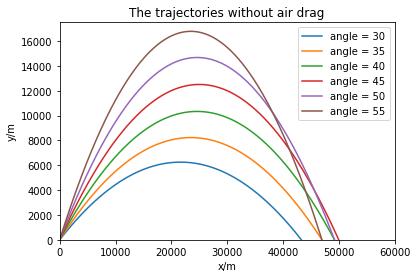

In [3]:
#Problem 2.6
import matplotlib.pyplot as plt
import numpy as np

class shell(object):
    def __init__(self, angle, velocity = 700., dt = 0.01):
        self.x = [0]
        self.y = [0]
        self.vx = [velocity * np.cos(angle * np.pi / 180)]
        self.vy = [velocity * np.sin(angle * np.pi / 180)]
        self.g = -9.8
        self.dt = dt
        self.angle = angle
    def emit(self):
        while(self.y[-1] >= 0):
            #xi+1 = xi + vxi * dt
            #yi+1 = yi + vyi * dt
            #vxi+1 = vxi
            #vyi+1 = vyi - g * dt
            self.x.append(self.x[-1] + self.vx[-1] * self.dt)
            self.y.append(self.y[-1] + self.vy[-1] * self.dt)
            self.vx.append(self.vx[-1])
            self.vy.append(self.vy[-1] + self.g * self.dt)
    def error(self):
        #compute error between analytical solution and numerical solution
        #exact x = 2 * vy / (-g) * vx
        exact_x = -2 * self.vy[0] * self.vx[0] / self.g
        error = self.x[-1] - exact_x
        return error
    def plot(self):
        plt.plot(np.asarray(self.x), np.asarray(self.y), label = "angle = {}".format(self.angle))
        plt.xlabel("x/m")
        plt.ylabel("y/m")
        plt.title("The trajectories without air drag")
        plt.legend()
        plt.axis([0, 60000, 0, 17500])
    
for i in range(30, 60, 5):
    a = shell(i)
    a.emit()
    a.plot()
    print("The error of the shell with degree {} is {:.2f}m".format(a.angle, a.error()))

In [ ]:
#Problem #2.10
#Part 1. Compute the trajectories with air drag
import matplotlib.pyplot as plt
import numpy as np

class shell(object):
    def __init__(self, velocity, angle, target_x, target_y):
        self.x = [0]
        self.y = [0]
        self.vx = [velocity * np.cos(angle * np.pi / 180)]
        self.vy = [velocity * np.sin(angle * np.pi / 180)]
        self.v = [velocity]
        self.g = -9.8
        self.dt = 0.1
        self.angle = angle
        self.target_x = target_x
        self.target_y = target_y
        self.B2 = -4.0e-5
    
    def emit(self):
        #vxi+1 = vxi - B2 * v * vx
        #vyi+1 = vyi - g * dt - B2 * v * vy
        #v = sqrt(vx**2 + vy**2)
        c = 1
        #c is used to break the loops
        while(self.y[-1] <= self.target_y):
            #execute when target is higher than 0
            self.x.append(self.x[-1] + self.vx[-1] * self.dt)
            self.y.append(self.y[-1] + self.vy[-1] * self.dt)
            self.vx.append(self.vx[-1] + self.B2 * self.v[-1] * self.vx[-1] * self.dt)
            self.vy.append(self.vy[-1] + self.g * self.dt + self.B2 * self.v[-1] * self.vy[-1] * self.dt)
            self.v.append(np.sqrt(self.vx[-1] ** 2 + self.vy[-1] ** 2))
            #if the shell is unable to get the altitute of the target, break this loop
            if(self.vy[-2] * self.vy[-1] <= 0):
                if(self.y[-1] < self.target_y):
                    c = -1
                    break
        while(self.y[-1] >= self.target_y):
            #Also, break this loop
            if(c == -1):
                break
            #execute all the time
            self.x.append(self.x[-1] + self.vx[-1] * self.dt)
            self.y.append(self.y[-1] + self.vy[-1] * self.dt)
            self.vx.append(self.vx[-1] + self.B2 * self.v[-1] * self.vx[-1] * self.dt)
            self.vy.append(self.vy[-1] + self.g * self.dt + self.B2 * self.v[-1] * self.vy[-1] * self.dt)
            self.v.append(np.sqrt(self.vx[-1] ** 2 + self.vy[-1] ** 2))
        #when c equals to -1, abandon the result
        return c
    
    def plot(self):
        plt.plot(np.asarray(self.x), np.asarray(self.y), label = "angle = {}".format(self.angle))
        plt.xlabel("x/m")
        plt.ylabel("y/m")
        plt.title("The trajectories with air drag")
        plt.legend()
        plt.grid()

#Part 2. Find the minimum velocity to hit the target

#get coordinates of target
target_x = float(input('Please input the x coordinate of target:'))
target_y = float(input('Please input the y coordinate of target:'))

def test_v(angle, target_x, target_y):
    #Try the range of velocity that can hit the target
    try_n = 0
    try_velocity = 0
    while(True):
        try_velocity = 100 * try_n
        a = shell(try_velocity, 45, target_x, target_y)
        a.emit()
        if(a.x[-1] > target_x):
            break
        try_n += 1
    return try_velocity - 100

#To deal with the situation of the angle is close to 90 degrees.
if(target_y > 5 * target_x):
    try_velocity = test_v(75, target_x, target_y)
else:
    try_velocity = test_v(45, target_x, target_y)

#Compute the result
try_n = 1
while(True):
    #velocity_step = 2.5m/s, whick can assure an accurate result and a small cost of time.
    velocity = try_velocity + 2.5 * try_n
    init_angle = max(np.arctan(target_y / target_x) * 180 / np.pi, 0)
    if(init_angle > 60):
        step = 0.05
    else:
        step = 1
    for angle in np.arange(init_angle, 90, step):
        a = shell(velocity, angle, target_x, target_y)
        #If c == -1, it means that this result is abandoned.
        c = a.emit()
        if(c == 1 and a.x[-1] > target_x - 1 and a.x[-1] < target_x + 1):
            try_n = -1
            break
    if(try_n == -1):
        break
    else:
        pass
    try_n += 1

print("The minimum velocity is {}m/s, with the angle of {}".format(velocity, angle))
print("The error is {:.2f}m".format(a.x[-1] - target_x))
a.plot()
plt.plot([target_x], [target_y], "ro")

In [ ]:
#Problem 2.12
#This is a draft
#Coriolis force:Fco = 2 v × omega * cosφ, φ represents latitude.
global omega = 2 * np.pi / 86400 * np.cos(np.pi / 6)


import matplotlib.pyplot as plt
import numpy as np

class shell(object):
    def __init__(self, velocity, theta, fai, target_x, target_y, target_z):
        #theta, fai is as which in spherical coordinate frame.
        self.x = [0]
        self.y = [0]
        self.z = [0]
        self.vx = [velocity * np.sin(theta * np.pi / 180) * np.sin(fai * np.pi / 180)]
        self.vy = [velocity * np.cos(theta * np.pi / 180)]
        self.vz = [velocity * np.sin(theta * np.pi / 180) * np.cos(fai * np.pi / 180)]
        self.v = [velocity]
        self.g = -9.8
        self.dt = 0.1
        self.theta = theta
        self.fai = fai
        self.target_x = target_x
        self.target_y = target_y
        self.target_z = target_z
        self.B2 = -4.0e-5

    def emit(self):
        ax = self.B2 * self.v[-1] * self.vx[-1] - 2 * omega * self.vz[-1]
        ay = self.g * self.dt + self.B2 * self.v[-1] * self.vy[-1]
        az = 2 * omega * self.vx[-1] + self.B2 * self.v[-1] * self.vz[-1]
        